In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import time
plt.style.use(['science', 'notebook', 'dark_background'])

Can define functions in python:

In [3]:
def f(x):
    return np.exp(-x**2) * np.sin(x)**2

And use them to plot:

In [4]:
x = np.linspace(-3, 3, 100)
y = f(x)

Plot:

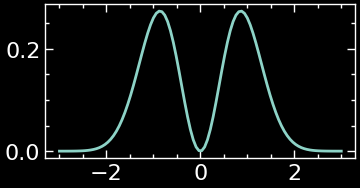

In [5]:
plt.figure(figsize=(4,2))
plt.plot(x,y)
plt.savefig('test.png', dpi=200)
plt.show()

How do we take the integral $\int_a^b f(x) dx$ in python if we know the functional form $f(x)$?

# The Quad Function

For when you know the explicit functional form $f(x)=...$ and you want $\int_{a}^b f(x)dx$
* $a$ and $b$ can be infinite
* Only gives numbers (i.e. not used for finding functional form of antiderivative)

## Basic Usage

In [9]:
result = quad(f, -2, 2)
result

(0.5548809679928509, 6.454188583322057e-13)

The first element of the tuple is the result and the second element is an estimate of the error. Infinite integrals can also be taken:

In [11]:
result = quad(f, -np.inf, np.inf)
result

(0.5602022593661148, 2.8851236306686894e-09)

Functions can take in arguments too:

In [12]:
def f(x, a, b):
    return np.exp(-a*x**2) * np.sin(b*x)**2
result = quad(f, -np.inf, np.inf, args=(2,3))
result

(0.619695537451406, 3.5151775346144984e-09)

If for some reason you don't need as small of an error (increase calculation speed) you can change the `epsabs` argument:

<span style="color: red;">  **Slow**: </span>

In [13]:
t1 = time.perf_counter()
# Take 10000 integrals
[quad(f, -np.inf, np.inf, args=(2,3)) for i in range(10000)]
t2 = time.perf_counter()
print(t2-t1)

8.707930900000008


<span style="color: red;"> **Faster with less error tolerance**: </span>

In [14]:
t1 = time.perf_counter()
# Take 10000 integrals
[quad(f, -np.inf, np.inf, args=(2,3), epsabs=1e-4) for i in range(10000)]
t2 = time.perf_counter()
print(t2-t1)

5.426980200000003


## Caveats

But this basic usage doesn't always work for all functions. For example:

* **sparse functions**

In [20]:
def f(x):
    return np.exp(-(x-700)**2) + np.exp(-(x+700)**2)

x = np.linspace(-750, 750, 10000)
y = f(x)

Plot:

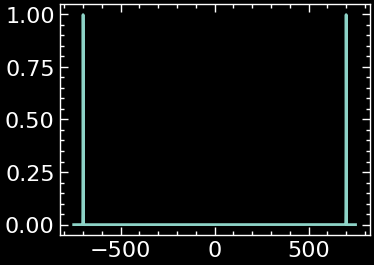

In [22]:
plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.show()

In [23]:
quad(f, -np.inf, np.inf)

(0.0, 0.0)

For such sparse functions, however, you can specify the locations where the function is non-zero:

* **Note**: Can no longer use infinite bounds of integration

In [24]:
quad(f, -800, 800, points=[-700,700])

(3.544907701811011, 1.9972548851034084e-10)

In [30]:
2*np.sqrt(np.pi)

3.5449077018110318